In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
df = pd.read_json('data/yelpreviews_50K.json', lines = True)

In [4]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,-MhfebM0QIsKt87iDN-FNw,0,2015-04-15 05:21:16,0,xQY8N_XvtGbearJ5X4QryQ,2,"As someone who has worked with many museums, I...",5,OwjRMXRC0KyPrIlcjaXeFQ
1,lbrU8StCq3yDfr-QMnGrmQ,0,2013-12-07 03:16:52,1,UmFMZ8PyXZTY2QcwzsfQYA,1,I am actually horrified this place is still in...,1,nIJD_7ZXHq-FX8byPMOkMQ
2,HQl28KMwrEKHqhFrrDqVNQ,0,2015-12-05 03:18:11,0,LG2ZaYiOgpr2DK_90pYjNw,5,I love Deagan's. I do. I really do. The atmosp...,1,V34qejxNsCbcgD8C0HVk-Q
3,5JxlZaqCnk1MnbgRirs40Q,0,2011-05-27 05:30:52,0,i6g_oA9Yf9Y31qt0wibXpw,1,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",0,ofKDkJKXSKZXu5xJNGiiBQ
4,IS4cv902ykd8wj1TR0N3-A,0,2017-01-14 21:56:57,0,6TdNDKywdbjoTkizeMce8A,4,"Oh happy day, finally have a Canes near my cas...",0,UgMW8bLE0QMJDCkQ1Ax5Mg


In [5]:
df.describe()

,cool,funny,stars,useful
count,50000.000000,50000.000000,50000.000000,50000.00000
mean,0.448920,0.369840,3.751000,1.09776
std,1.441885,1.345412,1.433862,2.37475
min,0.000000,0.000000,1.000000,0.00000
25%,0.000000,0.000000,3.000000,0.00000
50%,0.000000,0.000000,4.000000,0.00000
75%,0.000000,0.000000,5.000000,1.00000
max,93.000000,75.000000,5.000000,98.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
business_id    50000 non-null object
cool           50000 non-null int64
date           50000 non-null datetime64[ns]
funny          50000 non-null int64
review_id      50000 non-null object
stars          50000 non-null int64
text           50000 non-null object
useful         50000 non-null int64
user_id        50000 non-null object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 3.4+ MB


In [7]:
df.groupby('stars').describe()


cool                                                  funny  \
         count      mean       std  min  25%  50%  75%   max    count   
stars                                                                   
1       6911.0  0.197511  0.685111  0.0  0.0  0.0  0.0  12.0   6911.0   
2       4034.0  0.320526  1.173363  0.0  0.0  0.0  0.0  31.0   4034.0   
3       5605.0  0.450669  1.194922  0.0  0.0  0.0  0.0  21.0   5605.0   
4      11494.0  0.650426  1.769975  0.0  0.0  0.0  1.0  47.0  11494.0   
5      21956.0  0.445710  1.511759  0.0  0.0  0.0  0.0  93.0  21956.0   

                 ...              useful                                     \
           mean  ...  75%   max    count      mean       std  min  25%  50%   
stars            ...                                                          
1      0.527709  ...  1.0  33.0   6911.0  1.633628  3.151145  0.0  0.0  1.0   
2      0.530739  ...  0.0  66.0   4034.0  1.311849  2.464511  0.0  0.0  0.0   
3      0.424442  ...  0.0  15.0   5605.0  1.042284  1.818150  0.0  0.0  0.0   
4      0.411780  ...  0.0  45.0  11494.0  1.107099  2.257872  0.0  0.0  0.0   
5      0.254691  ...  0.0  75.0  21956.0  0.899025  2.224940  0.0  0.0  0.0   

                  
       75%   max  
stars             
1      2.0  75.0  
2      2.0  44.0  
3      1.0  21.0  
4      1.0  48.0  
5      1.0  98.0  

[5 rows x 24 columns]

In [8]:
df['length'] = df['text'].apply(len)
df['text'] = df['text'].str.lower()

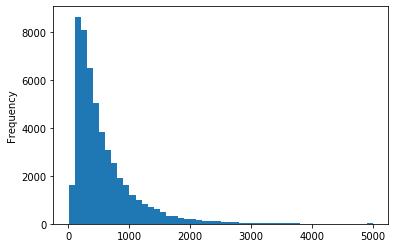

In [9]:
df['length'].plot(bins=50, kind='hist')

In [10]:
df.length.describe()

count    50000.000000
mean       571.614280
std        529.622173
min          2.000000
25%        228.000000
50%        405.000000
75%        729.000000
max       5000.000000
Name: length, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119ef2198>,
      dtype=object)

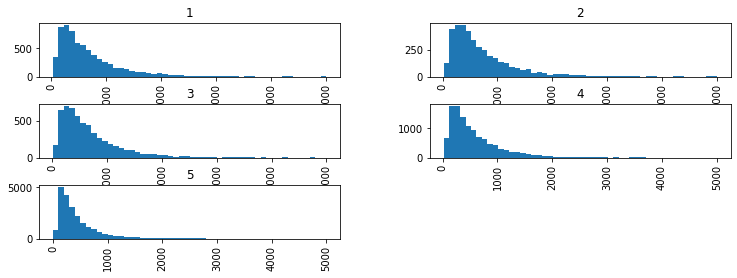

In [11]:
df.hist(column='length', by='stars', bins=50,figsize=(12,4))

In [12]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [13]:
df["review_no_punct"] = df['text'].apply(remove_punctuations)

In [14]:
df['review_no_punct']

0        as someone who has worked with many museums i ...
1        i am actually horrified this place is still in...
2        i love deagans i do i really do the atmosphere...
3        dismal lukewarm defrostedtasting texmex glop\n...
4        oh happy day finally have a canes near my casa...
5        this is definitely my favorite fast food sub s...
6        really good place with simple decor amazing fo...
7        awesome office and staff very professional and...
8        most delicious authentic italian ive had in th...
9        i have been here twice very nice and laid back...
10       maria is very good at what she does with great...
11       order in delivery review\n\ni discovered this ...
12       we purchased new office furniture from this lo...
13       everything that my husband and i tried today w...
14       called for a 515 morning reservation the drive...
15       if i could give less than one star that would ...
16       10pm on a super bowl sunday and theyre already.

In [15]:
def remove_stopwords(text):
    tokens = [word for word in text.split() if word.isalpha()]
    tokens = [word for word in tokens if len(word) > 1]
    tokens = [word for word in tokens if len(word) > 1]
    return ''.join(tokens)

In [16]:
df["review_no_stopwords"] = df['review_no_punct'].apply(remove_punctuations)

In [17]:
df['review_no_stopwords'].head()

0    as someone who has worked with many museums i ...
1    i am actually horrified this place is still in...
2    i love deagans i do i really do the atmosphere...
3    dismal lukewarm defrostedtasting texmex glop\n...
4    oh happy day finally have a canes near my casa...
Name: review_no_stopwords, dtype: object

In [18]:
df['review_no_stopwords'].head()[0]

'as someone who has worked with many museums i was eager to visit this gallery on my most recent trip to las vegas when i saw they would be showing infamous eggs of the house of faberge from the virginia museum of fine arts vmfa i knew i had to go\n\ntucked away near the gelateria and the garden the gallery is pretty much hidden from view its what real estate agents would call cozy or charming  basically any euphemism for small\n\nthat being said you can still see wonderful art at a gallery of any size so why the two s you ask let me tell you\n\n pricing for this while relatively inexpensive for a las vegas attraction is completely over the top for the space and the amount of art you can fit in there it is a bit much\n its not kid friendly at all seriously dont bring them\n the security is not trained properly for the show when the curating and design teams collaborate for exhibitions there is a definite flow that means visitors should view the art in a certain sequence whether it be b

In [24]:
df = df.replace(r'\n','', regex=True) 

In [27]:
df['review_no_stopwords'].head()[0]

'as someone who has worked with many museums i was eager to visit this gallery on my most recent trip to las vegas when i saw they would be showing infamous eggs of the house of faberge from the virginia museum of fine arts vmfa i knew i had to go  tucked away near the gelateria and the garden the gallery is pretty much hidden from view its what real estate agents would call cozy or charming  basically any euphemism for small  that being said you can still see wonderful art at a gallery of any size so why the two s you ask let me tell you   pricing for this while relatively inexpensive for a las vegas attraction is completely over the top for the space and the amount of art you can fit in there it is a bit much  its not kid friendly at all seriously dont bring them  the security is not trained properly for the show when the curating and design teams collaborate for exhibitions there is a definite flow that means visitors should view the art in a certain sequence whether it be by histor